# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Rifky Yudistiansyah
- Email: rifkyyudistiansyah@gmail.com
- Id Dicoding: rifky_yudistiansyah

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
!pip install catboost
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Atur style untuk visualisasi
sns.set(style='whitegrid')

### Menyiapkan data yang akan diguankan

## Data Understanding

In [ ]:
# Muat dataset
url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'
df = pd.read_csv(url, sep=';')

In [ ]:
df.Admission_grade

,Admission_grade
0,127.3
1,142.5
2,124.8
3,119.6
4,141.5
...,...
4419,122.2
4420,119.0
4421,149.5
4422,153.8


In [ ]:
# Tampilkan 5 baris pertama
print("Lima baris pertama dari data:")
df.head()

Lima baris pertama dari data:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                      

In [ ]:
# Tampilkan ringkasan statistik untuk kolom numerik
print("\nStatistik Deskriptif:")
df.describe(include='all')


Statistik Deskriptif:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [ ]:
# Periksa nilai yang hilang (missing values)
print("\nJumlah Nilai Hilang per Kolom:")
df.isnull().sum()


Jumlah Nilai Hilang per Kolom:


,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


### Exploratory Data Analysis (EDA)

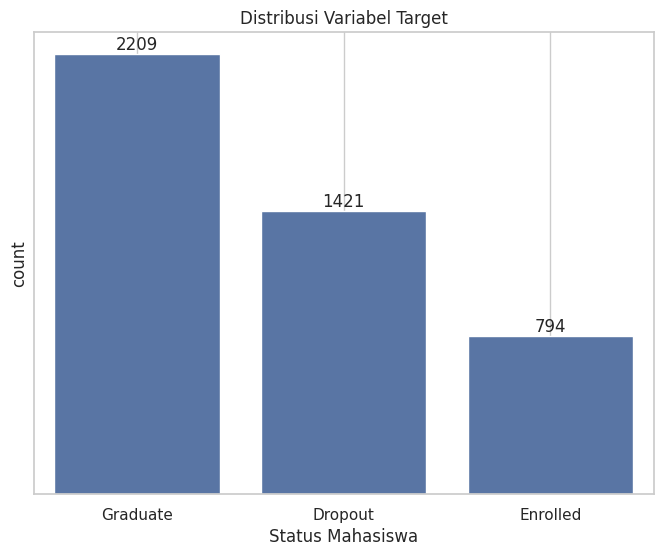


Persentase Distribusi Target:
Status
Graduate    49.93%
Dropout     32.12%
Enrolled    17.95%
Name: proportion, dtype: object


In [ ]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_yticks([])
ax.grid('False')
ax.set_title('Distribusi Variabel Target')
ax.set_xlabel('Status Mahasiswa')
plt.show()

# Menampilkan persentase
target_counts = df['Status'].value_counts(normalize=True) * 100
print("\nPersentase Distribusi Target:")
print(target_counts.round(2).astype(str) + '%')

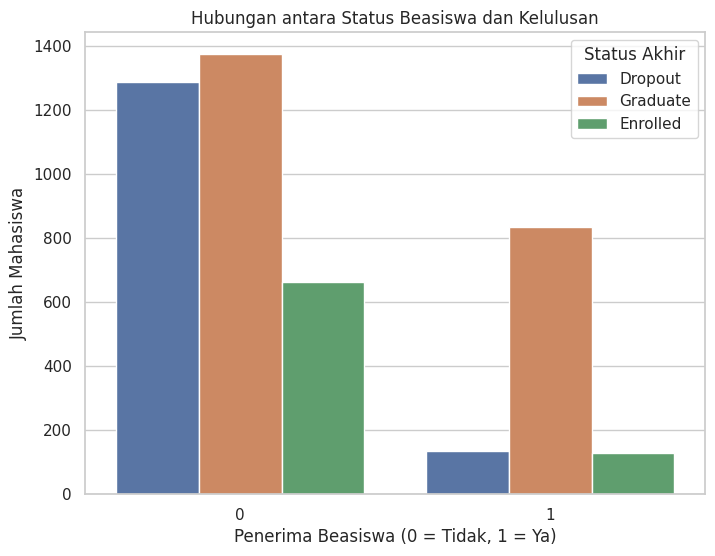

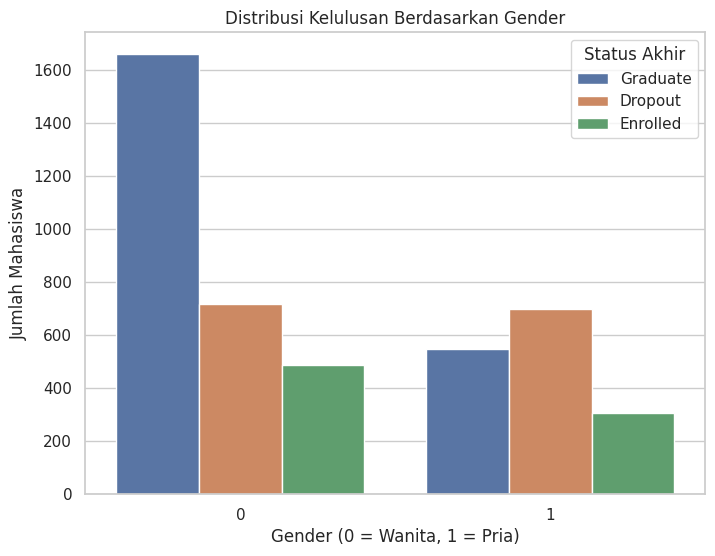

In [ ]:
# Analisis hubungan antara beasiswa dan status kelulusan
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Scholarship_holder', hue='Status')
plt.title('Hubungan antara Status Beasiswa dan Kelulusan')
plt.xlabel('Penerima Beasiswa (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status Akhir')
plt.show()

# Analisis gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Status')
plt.title('Distribusi Kelulusan Berdasarkan Gender')
plt.xlabel('Gender (0 = Wanita, 1 = Pria)')
plt.ylabel('Jumlah Mahasiswa')
plt.legend(title='Status Akhir')
plt.show()

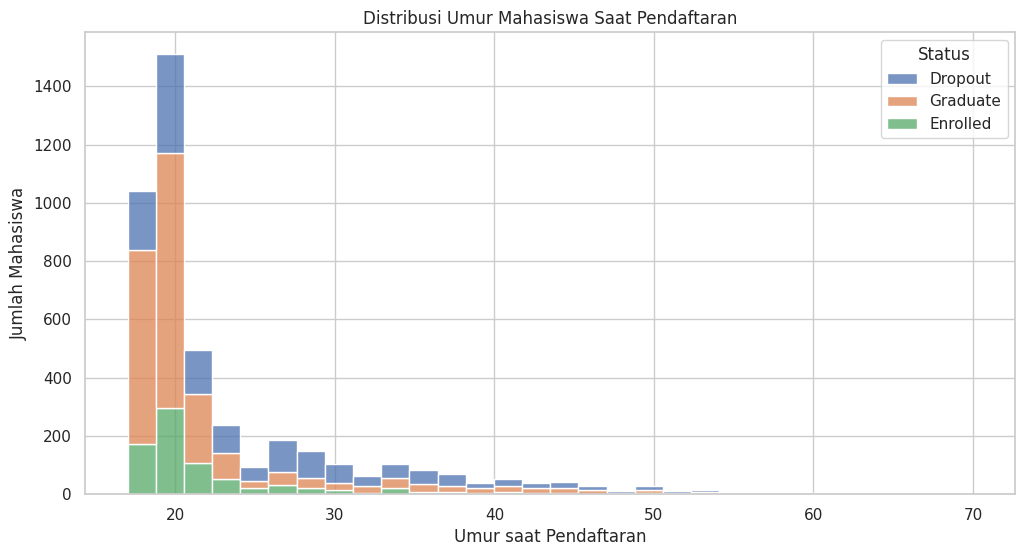

In [ ]:
# Analisis fitur numerik: Umur saat pendaftaran
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age_at_enrollment', hue='Status', multiple='stack', bins=30)
plt.title('Distribusi Umur Mahasiswa Saat Pendaftaran')
plt.xlabel('Umur saat Pendaftaran')
plt.ylabel('Jumlah Mahasiswa')
plt.show()

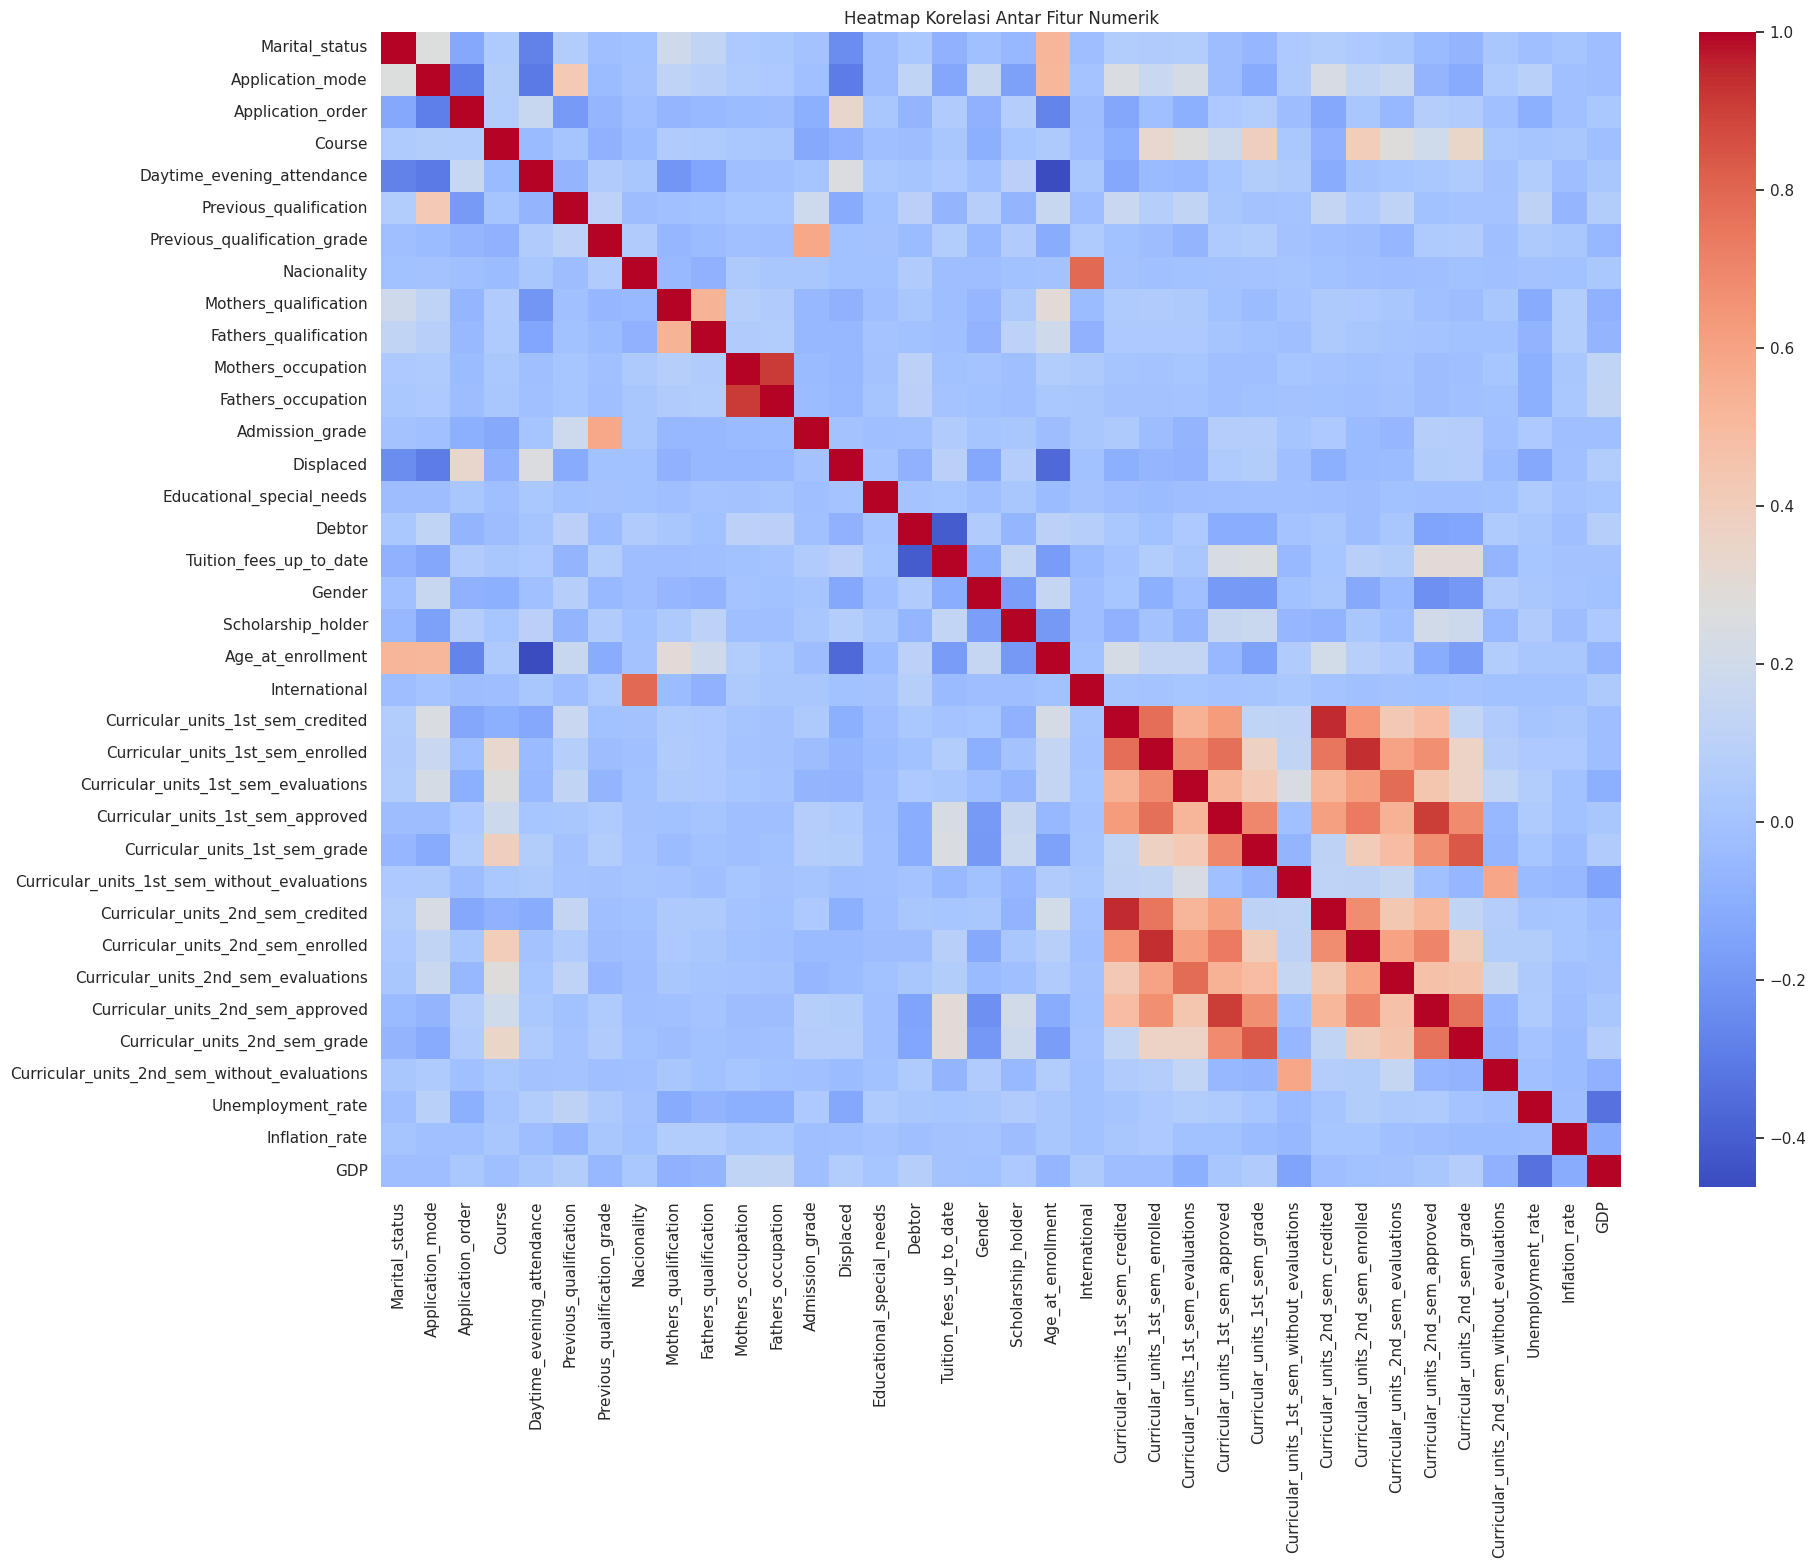

In [ ]:
plt.figure(figsize=(20, 15))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

### **Insight dari EDA**
* **Beasiswa:** Mahasiswa yang **tidak menerima beasiswa** memiliki jumlah absolut *dropout* yang jauh lebih tinggi.
* **Gender:** Proporsi *dropout* terlihat lebih tinggi pada mahasiswa **pria (1)** dibandingkan **wanita (0)**.
* **Umur:** Sebaran umur untuk mahasiswa yang *dropout* cenderung lebih luas, dengan puncak di usia yang lebih muda (sekitar 18-20 tahun) dan juga lonjakan kecil di usia yang lebih tua (di atas 30 tahun).
* **Nilai Kualifikasi dan Penerimaan**: Terdapat korelasi positif antara Previous qualification (grade) dan Admission grade. Artinya, mahasiswa dengan riwayat nilai yang baik sebelum masuk universitas cenderung memiliki nilai penerimaan yang baik pula.

## Data Preparation / Preprocessing

In [ ]:
# 1. Membuat salinan data
df_multi = df.copy()

# 2. Mengubah target menjadi numerik (multikelas)
target_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
df_multi['Status'] = df_multi['Status'].map(target_map)

# 3. Memisahkan fitur (X) dan target (y)
X = df_multi.drop('Status', axis=1)
y = df_multi['Status']

# 4. Membagi data menjadi data latih dan data uji (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Distribusi kelas di data latih:\n{y_train.value_counts(normalize=True)}")
print(f"\nDistribusi kelas di data uji:\n{y_test.value_counts(normalize=True)}")

Distribusi kelas di data latih:
Status
2    0.499294
0    0.321277
1    0.179429
Name: proportion, dtype: float64

Distribusi kelas di data uji:
Status
2    0.499435
0    0.320904
1    0.179661
Name: proportion, dtype: float64


In [ ]:
# 5. Pipeline untuk prapemrosesan data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

## Modeling

In [ ]:
models = {
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Dictionary untuk menyimpan pipeline yang sudah dilatih
trained_pipelines = {}

# Loop untuk melatih setiap model
for name, model in models.items():
    print(f"--- Melatih model {name} ---")

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    pipeline.fit(X_train, y_train)

    trained_pipelines[name] = pipeline
    print(f"Model {name} selesai dilatih.\n")

print("Semua model telah selesai dilatih.")

--- Melatih model SVM ---
Model SVM selesai dilatih.

--- Melatih model Random Forest ---
Model Random Forest selesai dilatih.

--- Melatih model CatBoost ---
Model CatBoost selesai dilatih.

--- Melatih model XGBoost ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:21:27] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model XGBoost selesai dilatih.

Semua model telah selesai dilatih.


## Evaluation

--- Hasil Evaluasi untuk SVM ---
              precision    recall  f1-score   support

     Dropout       0.84      0.73      0.78       284
    Enrolled       0.50      0.35      0.41       159
    Graduate       0.77      0.93      0.84       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



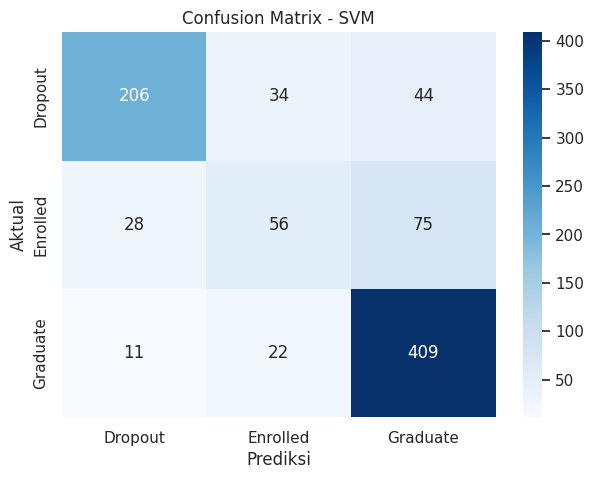

--------------------------------------------------
--- Hasil Evaluasi untuk Random Forest ---
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.77       284
    Enrolled       0.56      0.35      0.43       159
    Graduate       0.78      0.92      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



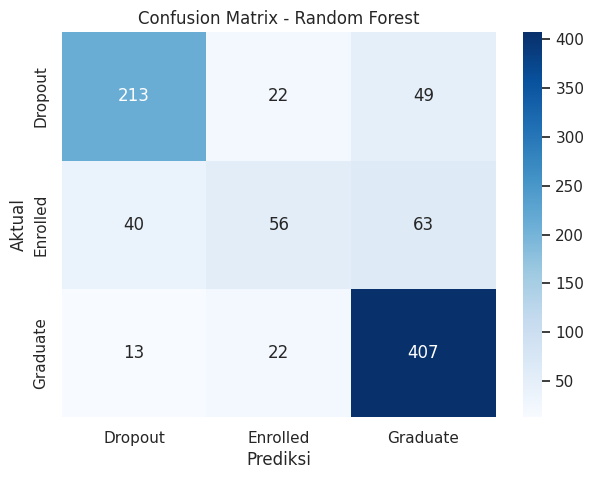

--------------------------------------------------
--- Hasil Evaluasi untuk CatBoost ---
              precision    recall  f1-score   support

     Dropout       0.81      0.75      0.78       284
    Enrolled       0.54      0.42      0.47       159
    Graduate       0.81      0.91      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.69      0.70       885
weighted avg       0.76      0.77      0.76       885



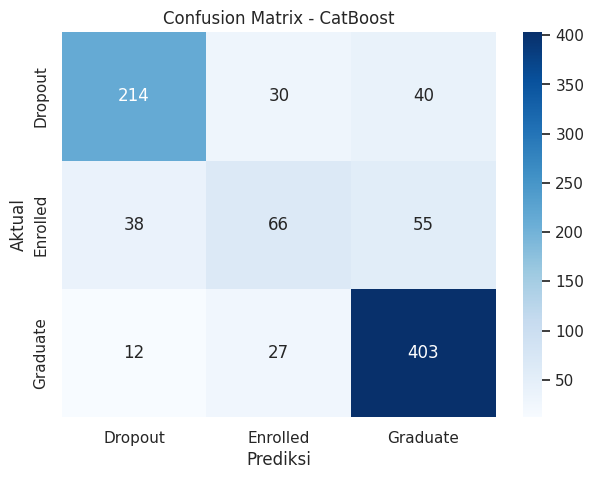

--------------------------------------------------
--- Hasil Evaluasi untuk XGBoost ---
              precision    recall  f1-score   support

     Dropout       0.81      0.74      0.77       284
    Enrolled       0.51      0.45      0.48       159
    Graduate       0.82      0.90      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.76      0.77      0.76       885



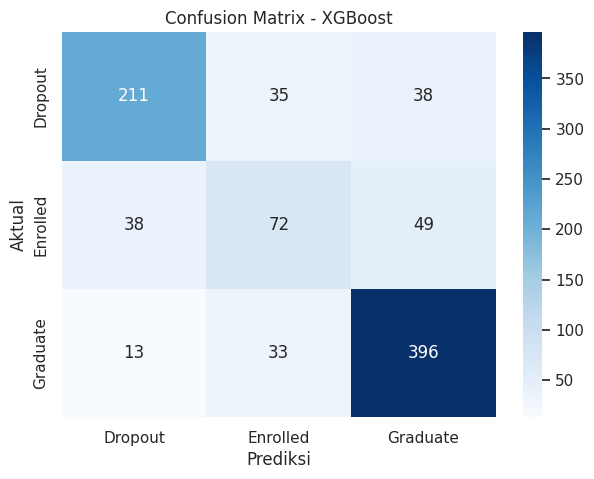

--------------------------------------------------


In [ ]:
results = []
target_names = ['Dropout', 'Enrolled', 'Graduate']

for name, pipeline in trained_pipelines.items():
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Weighted Recall': recall,
        'Weighted Precision': precision,
        'Weighted F1-Score': f1
    })

    print(f"--- Hasil Evaluasi untuk {name} ---")
    print(classification_report(y_test, y_pred, target_names=target_names))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()
    print("-" * 50)

results_df = pd.DataFrame(results)

In [ ]:
# Tampilkan tabel perbandingan hasil
print("Tabel Perbandingan Performa Model (Multikelas)")
results_df_sorted = results_df.sort_values(by='Weighted F1-Score', ascending=False).reset_index(drop=True)
results_df_sorted

Tabel Perbandingan Performa Model (Multikelas)


,Model,Accuracy,Weighted Recall,Weighted Precision,Weighted F1-Score
0,CatBoost,0.771751,0.771751,0.760691,0.762969
1,XGBoost,0.767232,0.767232,0.760310,0.762175
2,Random Forest,0.763842,0.763842,0.749232,0.749285
3,SVM,0.758192,0.758192,0.746525,0.745353


In [ ]:
import pickle

# Pipeline CatBoost adalah yang terbaik dari hasil evaluasi
best_pipeline = trained_pipelines['CatBoost']

# Simpan pipeline ke dalam sebuah file
with open('CatBoost_pipeline.pkl', 'wb') as file:
    pickle.dump(best_pipeline, file)

print("Model berhasil disimpan")

Model berhasil disimpan


In [ ]:
!pip install pipreqs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Penerapan-Data-Science-SubmissionAkhir" --scan-notebooks --force

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/Penerapan-Data-Science-SubmissionAkhir/requirements.txt


In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit